# 1 ) Load the CIFAR10 Dataset

In [ ]:
from tensorflow import keras
from keras import datasets, layers, losses ,metrics
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


# 2 ) Model Architecture 

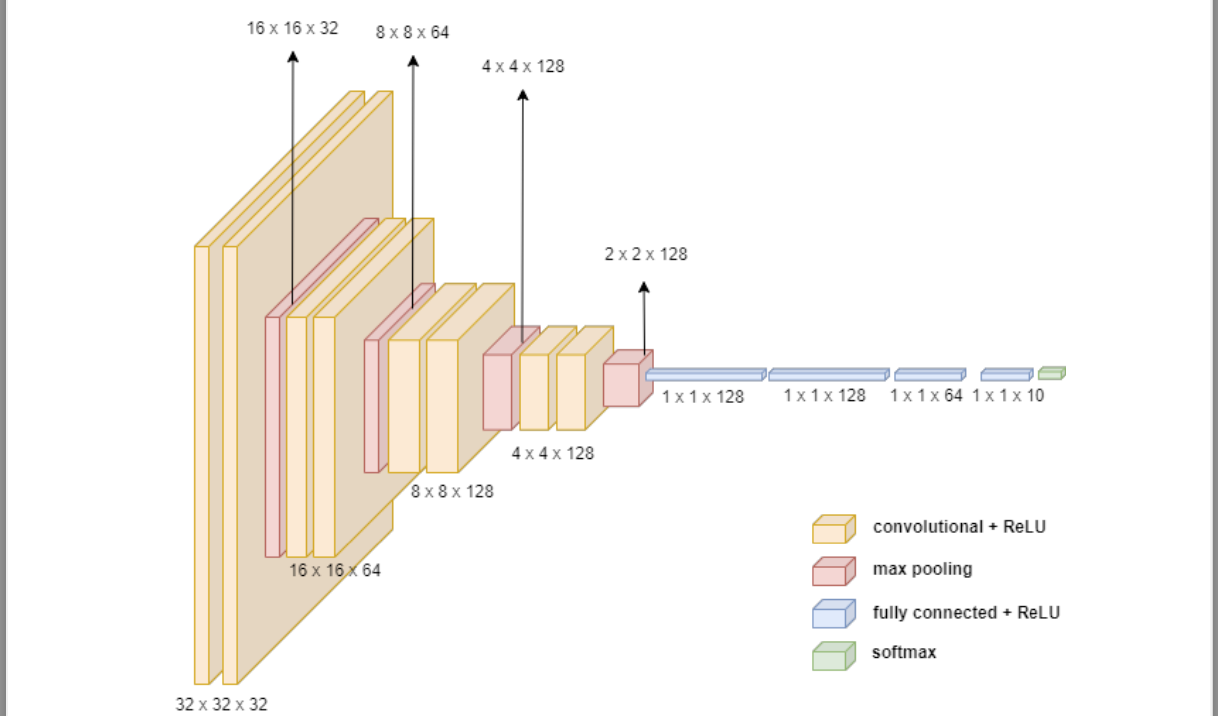

In [ ]:
model = keras.Sequential([
                          
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 16, 16, 64)       

# 3 ) Train The CNN Model

In [ ]:
model.compile(optimizer='adadelta', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=50, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1000/1000 [==============================] - 10s 9ms/step - loss: 0.3450 - accuracy: 0.8849 - val_loss: 0.4620 - val_accuracy: 0.8520
Epoch 2/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3463 - accuracy: 0.8845 - val_loss: 0.4616 - val_accuracy: 0.8518
Epoch 3/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3472 - accuracy: 0.8825 - val_loss: 0.4622 - val_accuracy: 0.8514
Epoch 4/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.3490 - accuracy: 0.8830 - val_loss: 0.4621 - val_accuracy: 0.8516
Epoch 5/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3524 - accuracy: 0.8825 - val_loss: 0.4618 - val_accuracy: 0.8519
Epoch 6/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.3456 - accuracy: 0.8833 - val_loss: 0.4621 - val_accuracy: 0.8523
Epoch 7/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3486 - accuracy: 0.8844 - val_loss: 0.4622 - val_accu

# 4 ) Evaluate The CNN Model

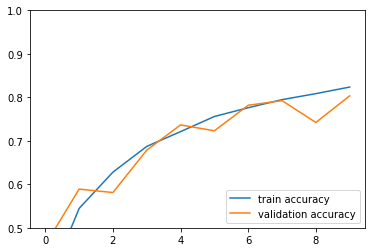

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.6220 - accuracy: 0.7927
